# Lecture 6: Convolutional Neural Networks

## Excercise 1 (Theory) (25/100)

### Output of a convolution
A convolution is defined as an operation which *convolves* an input feature with a weight matrix. This is the core component of Convolutional Neural Networks (CNNs) as you have seen in the lecture. An example pipeline of a CNN can be summarized in the sketch below taken from [Bishop C. and Bishop H. (2023)](https://www.bishopbook.com)

<p align="center">
  <img src="Figure_23.png" />
</p>

where the general convolution operation between a $3\times 3$ matrix and a convolutional filter of size $2\times 2$ is shown below

<p align="center">
  <img src="Figure_3.png" />
</p>

Now consider the following example of the convolution of a $4 \times 4$ input matrix with a $2 \times 2$ filter as shown in the image below.

<p align="center">
  <img src="cnn_excercise1.png" />
</p>

In the following excercise you have to:

- **Task (1.a)** **(10 pts.)** Explicitly calculate the output of the convolution of a $4 \times 4$ input matrix with a $2 \times 2$ filter, as shown in the image above. Use a stride of 1. What is the shape of the resulting matrix?
- **Task (1.b)** **(5 pts.)** Use different pooling methods to further reduce the output matrix from excercise **1.a** from a $3 \times 3$ to a $2 \times 2$ matrix. The pooling methods you should use are: Average Pooling, Sum Pooling and Max Pooling.
- **Task (1.b)** **(10 pts.)** From the results you got in task **1.b**, and what you learned in the lecture, what can you say about the effects of the different types of pooling operations?

## Excercise 2 (Theory) (15/100)

### Understanding Receptive Fields in CNNs

In a convolutional neural network (CNN), the [receptive field](https://medium.com/@saba99/receptive-field-1726fe6ea94f#:~:text=In%20Convolutional%20Neural%20Networks%20(CNNs,its%20predictions%20or%20feature%20extractions.)) refers to the area of the input image that a particular neuron in a convolutional layer "sees" through its filter. 

Consider a CNN with the following architecture:

- Input image: $28 \times 28$ pixels (grayscale, i.e., one channel)
- First convolutional layer:
    * Filter size: $M \times M$ (with $M \ll 28$)
    * No padding $(P = 0)$
    * Stride: 1 (filter moves one pixel at a time)

**Task 2.a (5 pts.):**

What is the receptive field size of a neuron in the first convolutional layer for this architecture?

**Task 2.b (10 pts.):**

Now assume $M=3$. Would the receptive field size change if we added padding of size 1 $(P = 1)$ to the input image before the convolutional layer? Motivate your answer with a detailed explanation.



## Excercise 1 (Programming) (20/100)

### Convolution and Pooling operation in CNNs

Explain the concepts of convolution and pooling operations in CNNs using PyTorch code.
- **Task (1.a)** **(10 pts.)** Define a simple random tensor `x` representing a grayscale image of size $28 \times 28$. Then define a simple convolutional layer and analyze the output tensor. What is the shape you expect from this convolution operation and why?         
*Hint*: look into the [`torch.nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) function in PyTorch      
- **Task (1.b)** **(10 pts.)** Now define a simple pooling operation of your choice and apply this to the output of the convolution operation. What is the shape you expect from this convolution operation and why? What type of pooling layer have you used and why?         
*Hint*: look into the [`pooling layers`](https://pytorch.org/docs/stable/nn.html#pooling-layers) available in PyTorch.      


The `nn.Conv2d` function expects a shape of (Batchsize, Channels, h, w ), since we are workig with a single greyscale image the batchsize and channels are one.

In [4]:
import torch
import torch.nn as nn

# Define an input tensor in grayscale of shape 28x28
x = torch.rand((1,1,28,28))
# Define a 2D convolutional layer

conv_layer =  nn.Conv2d(1,1,3)

conv_output = conv_layer(x)

print("Convolution Output Shape:", conv_output.shape)

# Define a max pooling layer

pool_layer = nn.LPPool2d(42,4)

# Apply your pooling layer

pooled_output = pool_layer(conv_output)

print("Pooled Output Shape:", pooled_output.shape)

Convolution Output Shape: torch.Size([1, 1, 26, 26])
Pooled Output Shape: torch.Size([1, 1, 6, 6])


To calculate the output size of a Conv layer the following formula holds  [[Source](https://towardsdatascience.com/a-comprehensible-explanation-of-the-dimensions-in-cnns-841dba49df5e)]
$$\text{Output size} = \Biggl\lfloor\frac{(\text{Input size} - \text{Kernel size} + 2 \times \text{Padding})}{\text{Stride}}\Biggr\rfloor + 1 \, .$$
For an kernel size of 3, a padding of 0 and a stride of 1, we expect a outshape of `(26,26)`.

As pooling layer we choosed the `LPPool2d` function wich applies a 2D  42 power-average pooling over the given input. It woas used because it is a little bit exotic. The forumla to calculate the output shape reads [[Source](https://pytorch.org/docs/stable/generated/torch.nn.LPPool2d.html#torch.nn.LPPool2d)]
$$\text{Output size} = \Biggl\lfloor\frac{\text{Input size} - \text{Kernel size} }{\text{Stride}}+1\Biggr\rfloor  \, .$$
For an input size of 26 and Kernel size of 4 we expect a shape of `(6,6)`. Note that as long as no stride is given as argument, the kernel size is used as stride.

## Excercise 2 (Programming) (40/100)

### Implementing a Simple CNN for Image Classification

Train a classifier to perform a classification task on the [`CIFAR10` dataset](https://en.wikipedia.org/wiki/CIFAR-10). You can refer to this [tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for some inspiration. 
To achieve this, design a simple CNN architecture for image classification using [PyTorch](https://pytorch.org) and fine tune the hyperparameters to achieve the lowest possible loss. As an additional resource, you can take inspiration from the multiple tutorials and blogpost you find online giving you an introduction on how to implement CNNs from scratch with pytorch, e.g., [this one](https://blog.paperspace.com/writing-cnns-from-scratch-in-pytorch/).

- **Task (2.a)** **(15 pts.)** Implement your variation of Simple CNN following the structure below and filling the code gaps with your own implementation. Train the model using your implementation. For your convenience, the dataset is already split into Train and Test Data. 
- **Task (2.b)** **(15 pts.)** Describe your `SimpleCNN` implementation step by step and discuss your implementation based on the performance of your model. As a guidance, you may for example think of answering the following questions: What can you observe? Is your network training as expected? What can you say about the training and test losses? Which type of pooling operations you chose and why?     
- **Task (2.c)** **(10 pts.)** Try to further tune the parameters of your network and the learning hyperparameters to achieve the highest possible accuracy. Comment on how each hyperparameter seems to improve/worsen the training and why you think this happens. Does youe generalization error (see previous lectures) changes when the performance on the training set improves? Provide plots, experiments, and analysis (e.g., losses, accuracies, performance on train and test data etc.) of the results obtained from your experiments in order to support your claims.

To see some development when coosing diffrent Hyperparameters and layouts we abstracted the code into a function, which takes the NN, as well as hyperparameters as arguments

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

Using device: cuda:0


In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [9]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [11]:
def get_Loader(batchsize):
    train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=False)
    return train_loader, test_loader 

train_loader, test_loader = get_Loader(64)

In [25]:
def train_Model(model, epochs,train_loader, criterion=nn.CrossEntropyLoss(),optim=optim.Adam, optim_kwargs={'lr': 0.001}):
        optimizer = optim(model.parameters(), **optim_kwargs)
        model = model.to(device)
        test_losses = np.zeros(epochs)
        for epoch in range(epochs):
                model.train()
                for inputs, labels in train_loader:
                        inputs,labels = inputs.to(device), labels.to(device)
                # initialize the grad to zero
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs,labels)
                        loss.backward()
                        optimizer.step()
                test_losses[epoch] = loss.item()
                print(f'Epoch {epoch+1}, Loss: {loss.item()}')
        return model, test_losses

def test_Model(model, test_loader):
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs,labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
        print(f'Accuracy on test data: {100 * correct / total}%')


In [23]:


# Define a simple CNN model
class CNNFromLastSheet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.Conv2 = nn.Conv2d(6, 16, 5)
        self.lin1 = nn.Linear(16 * 5 * 5,120)
        self.lin2 = nn.Linear(120, 84)
        self.lin3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(0.3)
    def forward(self, x):
        x = self.pool(F.relu(self.Conv1(x))) 
        x = self.pool(F.relu(self.Conv2(x)))  
        x = x.view(-1, 16 * 5 * 5)            # falttens the array 
        x = F.relu(self.lin1(x))  
        x=  self.dropout(x)            
        x = F.relu(self.lin2(x))  
        x=  self.dropout(x)            
        x = self.lin3(x)             
                         
        return x


In [30]:
model1, loss1 =  train_Model(CNNFromLastSheet(),50,train_loader)

Epoch 1, Loss: 1.4966144561767578
Epoch 2, Loss: 1.4415783882141113
Epoch 3, Loss: 1.5636042356491089
Epoch 4, Loss: 1.3103501796722412
Epoch 5, Loss: 1.7562552690505981
Epoch 6, Loss: 1.3111032247543335
Epoch 7, Loss: 1.285030722618103
Epoch 8, Loss: 0.9285892248153687
Epoch 9, Loss: 0.7297058701515198
Epoch 10, Loss: 1.1538857221603394
Epoch 11, Loss: 0.9062859416007996
Epoch 12, Loss: 1.3394174575805664
Epoch 13, Loss: 1.6256235837936401
Epoch 14, Loss: 0.9509310722351074
Epoch 15, Loss: 1.257232427597046
Epoch 16, Loss: 1.137119174003601
Epoch 17, Loss: 1.2091913223266602
Epoch 18, Loss: 0.8468937873840332
Epoch 19, Loss: 0.9646720886230469
Epoch 20, Loss: 1.2967891693115234
Epoch 21, Loss: 1.0641506910324097
Epoch 22, Loss: 1.217573642730713
Epoch 23, Loss: 1.0253325700759888
Epoch 24, Loss: 1.3083901405334473
Epoch 25, Loss: 0.5788895487785339
Epoch 26, Loss: 1.0964330434799194
Epoch 27, Loss: 0.8482760190963745
Epoch 28, Loss: 1.2284905910491943
Epoch 29, Loss: 0.698213815689086

In [31]:
test_Model(model1,test_loader)

Accuracy on test data: 65.31%


In [32]:
import matplotlib.pyplot as plt

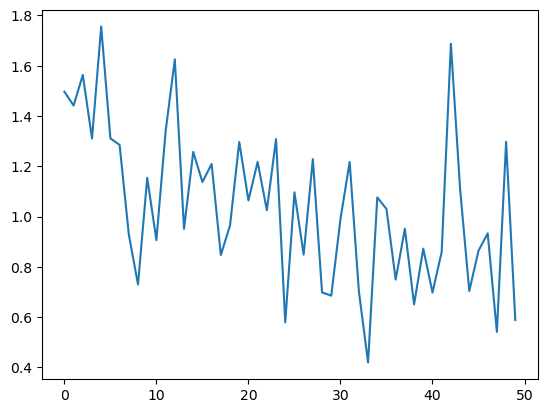

In [33]:
plt.plot(loss1)